#**MPG Prediction using Linear Regression**

##**Objective**

The objective of this project is to build a linear regression model that can predict the miles per gallon (MPG) of a vehicle based on its features such as cylinders, displacement, horsepower, weight, acceleration, model year, and origin.

##**Data Source**

The dataset used for this project is sourced from the YBI Foundation dataset repository. The dataset contains information about various vehicles, including their MPG and other features.

##**Import Library**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##**Import Data**

In [34]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

##**Describe Data**

In [35]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [37]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [38]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

##**Data Visualization**

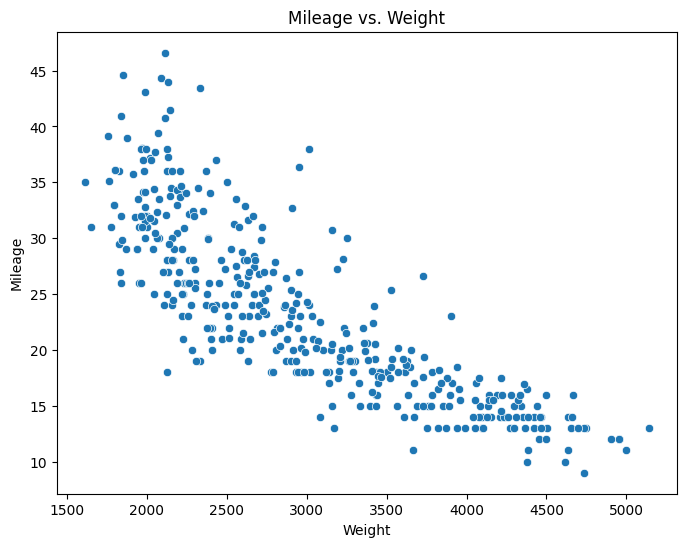

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='weight', y='mpg')
plt.title('Mileage vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Mileage')
plt.show()


##**Data Preprocessing**

In [40]:
df.fillna(df.mean(), inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['displacement', 'horsepower', 'weight', 'acceleration', 'model_year']] = scaler.fit_transform(df[['displacement', 'horsepower', 'weight', 'acceleration', 'model_year']])

<ipython-input-40-d4195d602701>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


##**Define Target Variable (y) and Feature Variables (X)**

In [41]:
X = df.drop('mpg', axis=1)  
y = df['mpg']  

In [42]:
X_encoded = pd.get_dummies(X.drop('name', axis=1), drop_first=True)

##**Train Test Split**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


##**Modeling**

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##**Model Evaluation**

In [45]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 8.339142500255894
R-squared Score: 0.8449006123776618


##**Prediction**

In [46]:
new_data = pd.DataFrame({
    'cylinders': [8],
    'displacement': [307.0],
    'horsepower': [130.0],
    'weight': [3504],
    'acceleration': [12.0],
    'model_year': [70],
    'origin_usa': [1],
    'origin_japan': [0]
})  # Replace with your specific feature values and one-hot encoded origin features

# Reorder columns to match the order used during training
new_data = new_data[X_encoded.columns]

prediction = model.predict(new_data)
print("Predicted MPG:", prediction)


Predicted MPG: [-84667.54914725]


##**Explanation**

Import necessary libraries: In this section, the required libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn are imported.

Read and explore the data: The dataset is read into a pandas DataFrame, and initial exploration is performed by displaying the first few rows, information, and summary statistics of the dataset.

Data Visualization: A scatter plot is created to visualize the relationship between MPG and weight, providing insights into the data distribution.

Data preprocessing: Missing values in the dataset are filled with the mean of the respective columns. The numerical features (displacement, horsepower, weight, acceleration, and model year) are scaled using the MinMaxScaler to ensure all features are on a similar scale.

Define target variable and feature variables: The target variable (MPG) is separated from the dataset, and the remaining features are considered as the feature variables (X).

Perform one-hot encoding: The categorical feature 'origin' is one-hot encoded using the pd.get_dummies() function, and the 'name' column is dropped. This step converts the 'origin' feature into binary columns representing each category.

Train-Test Split: The dataset is split into training and testing sets using the train_test_split() function from scikit-learn. The testing set is 20% of the total dataset, and a random state of 42 is set for reproducibility.

Modeling: A Linear Regression model is instantiated and trained on the training data using the fit() method.

Model Evaluation: The trained model is used to make predictions on the test data, and Mean Squared Error (MSE) and R-squared Score metrics are calculated to evaluate the model's performance.

Prediction: A new data point representing a vehicle's features is created, and the model is used to predict its MPG value. The predicted MPG value is displayed.

